* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)


* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

## Erzeuge einen DataFrame aus `student-math.csv`

In [34]:
import pandas as pd
students = pd.read_csv("./data/student-math.csv", na_values=['Not Provided'])

## Ermittle nach Geschlechtern gruppiert den durchschnittlichen Alkoholkonsum

In [35]:
modified = pd.DataFrame(students, columns=["sex", "Walc", "Dalc"])
modified.Walc = modified.Walc * 2/7 + modified.Dalc * 5/7
modified.groupby(by="sex")["Walc"].mean()

sex
F    1.455357
M    1.998472
Name: Walc, dtype: float64

## Ermittle jene 3 Features, welche am meisten mit `G3` korrelieren, abgesehen von `G1` und `G2`


In [36]:
students.corr().abs()["G3"].sort_values(ascending=False).drop(labels=["G1", "G2", "G3"]).head(3)


# s = modified.unstack()
# so = s.sort_values(kind="quicksort")
# so

failures    0.360415
Medu        0.217147
age         0.161579
Name: G3, dtype: float64

## Ermittle jene 3 Features, welche am meisten mit `Walc` korrelieren

In [37]:
students.corr().abs()["Walc"].sort_values(ascending=False).drop(labels=["Walc"]).head(3)

Dalc         0.647544
goout        0.420386
studytime    0.253785
Name: Walc, dtype: float64

## Ermittle die Absenzzahl jenes Schülers mit den meisten Absenzen, der trotzdem >= 10 G3 hat

In [38]:
students.absences.where(students.G3 >= 10).max()

54.0

## Ermittle, ob die Schüler mit mehr als 18 Punkten eher aus dem ruralen oder aus dem urbanen Raum kommen

In [39]:
students.where(students.G3 >= 18).groupby(by="address").G3.count()
#Sie kommen eher aus dem urbanen Gebiet

address
R     3
U    15
Name: G3, dtype: int64

## Versuche, folgende Behauptung zu widerlegen:
"Dass die Eltern unter einem Dach leben ist sehr wichtig für eine **herausragende** Mathematiknote, immerhin leben doppelt so viele dieser Schüler mit **beiden** Eltern zusammen"

In [40]:
students.Pstatus.where(students.G3 >= 18).value_counts()

T    14
A     4
Name: Pstatus, dtype: int64

In [41]:
students.Pstatus.value_counts() / len(students)
#Das stimmt nicht, da zum Vergleich fast 90% der Eltern zusammenleben

T    0.896203
A    0.103797
Name: Pstatus, dtype: float64

## Erzeuge folgende Graphik, welche die Punkte nach Adresse darstellt
![img.png](./assets/img.png)
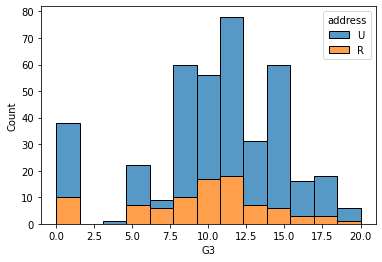

<AxesSubplot:xlabel='G3', ylabel='count'>

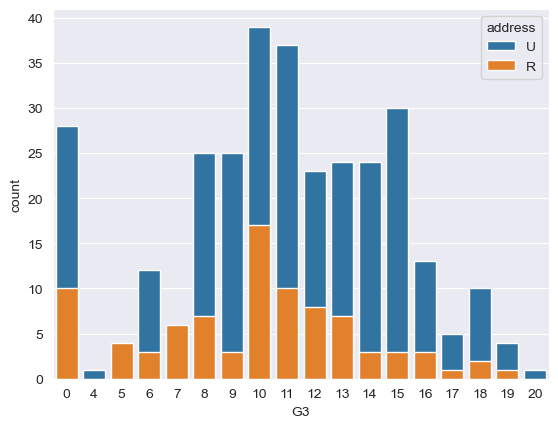

In [42]:
import seaborn as sns
sns.countplot(data=students, x="G3", hue="address",dodge=False)

## Ermittle die durchschnittliche Punktzahl aller Schüler, bei denen Mutter und Vater derselben Berufsgruppe angehören, gruppiert nach Berufsgruppe

In [43]:
students.where(students.Mjob == students.Fjob).groupby("Fjob").G3.mean()

Fjob
at_home     12.285714
health      13.500000
other        9.798077
services    10.767442
teacher     13.083333
Name: G3, dtype: float64

## Ersetze fehlende Werte durch den **Median** der jeweiligen `address`

In [47]:
modified = pd.DataFrame.copy(students)
modified.traveltime.fillna(modified.groupby("address").traveltime.transform("median"), inplace=True)
modified

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
